In [29]:
import os
import math
import random
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

Loading the first dataset

In [30]:
d = pd.read_csv("second_clustering_dataset.csv",names=['x0', 'x1'])

Illustrating the first data in a 2D plot

In [31]:
d

,x0,x1
0,1.047961,0.357217
1,0.201221,0.295197
2,0.163506,-1.846756
3,0.876857,1.499314
4,1.389838,0.092843
...,...,...
445,12.353425,21.892071
446,12.398762,21.301938
447,12.713268,19.627323
448,13.503682,20.372600


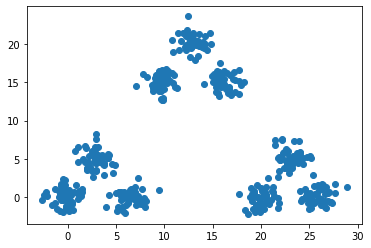

In [32]:
plt.scatter(d['x0'],d['x1'])

Transfer points to a list of coordinates

In [33]:
dataset=[]
for index, row in d.iterrows():
        dataset.append([row['x0'], row['x1']]) 
dataset = np.array(dataset)

In [34]:
def mean (clust):
    average = []
    for i in range(len(clust[0])):
        average.append(0) 
    for dimension in range(len(average)):
        for points in clust:
            average[dimension] += points[dimension]
        average[dimension] /= len(clust)
    return average

In [35]:
def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data))
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    return sites

In [36]:
def lloyd(data, cluster_num, iterations, sites = None):
    global SSE
    clusters = []
    #the buckets
    for i in range(cluster_num):
        clusters.append([])
        if sites is None:
            sites = get_rand_sites(data,cluster_num)
    #evaluating points in the dataset for enough amount of iterations
    for i in range(iterations): 
        SSE = 0
        #we first find the closest then it will be added to the cluster it belongs to
        #by first assuming the first one is the closest but by future iterations it will be updated
        for point in range(len(data)):
            closestSiteNumber = 0
            closestSiteDistance = distance.euclidean(sites[0], data[point]) 
            for siteNumber in range(1,len(sites),1):
                siteDistance = distance.euclidean(sites[siteNumber], data[point])
                if siteDistance < closestSiteDistance:
                    #updating the closest site so far
                    closestSiteDistance = siteDistance
                    closestSiteNumber = siteNumber
            SSE += closestSiteDistance
            #After all the sites are checked we can 
            clusters[closestSiteNumber].append(data[point])
        #initializing new sites
        for m in range(cluster_num):
            sites[m] = mean(clusters[m])
            clusters[m].clear()
    SSE = math.sqrt(SSE/len(data))
    print(SSE)
    return sites

2.10225762510485


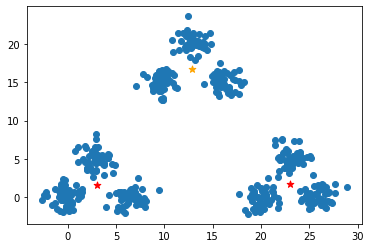

In [37]:
cluster_points = lloyd(dataset,3,1)
plt.scatter(d['x0'],d['x1'])
for index, point in enumerate(cluster_points):
    #these points are generated
    if index != 0: 
        plt.scatter(point[0],point[1], marker='*', c='red', s=50)
    #our frst point --> picked staticly
    if index == 0: 
        plt.scatter(point[0],point[1], marker='*', c='orange', s=50)

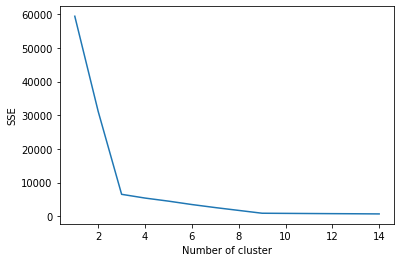

In [38]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=200).fit(dataset)
    #Inertia is sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [39]:
pip install fuzzy_c_means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from fcmeans import FCM

In [41]:

for k in range(1, 15):
  fcmModel = FCM(n_clusters =k)
  fcmModel.fit(dataset)
  pred = fcmModel.predict(dataset) 
  print('Predicted Value for fcmModel is : ' , pred)

  center = fcmModel.centers
  print("centers with number cluster :" )
  print(k)
  print(center)

Predicted Value for fcmModel is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
centers with number cluster :
1
[[12.97370118  6.68

In [42]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import skfuzzy as fuzz

In [44]:
xptr=d['x0']
yptr=d['x1']

In [45]:
xptr

0       1.047961
1       0.201221
2       0.163506
3       0.876857
4       1.389838
         ...    
445    12.353425
446    12.398762
447    12.713268
448    13.503682
449    12.546129
Name: x0, Length: 450, dtype: float64

In [46]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

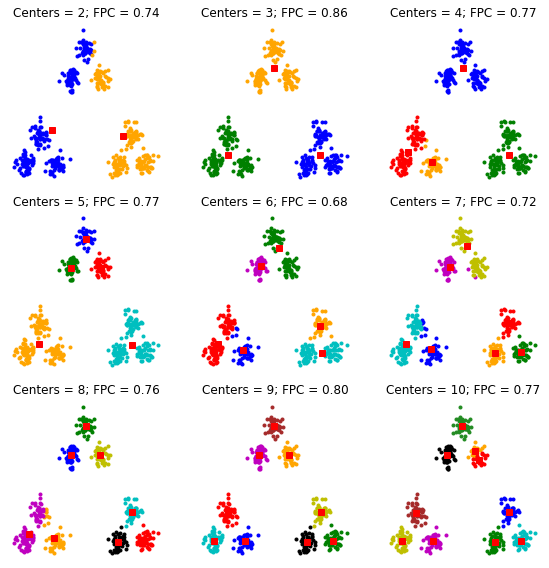

In [47]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xptr, yptr))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=200, init=None)
    #storing fpc values 
    fpcs.append(fpc)
    #plotting assigned clusters
    #for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xptr[cluster_membership == j],
                yptr[cluster_membership == j], '.', color=colors[j])

    #marking the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

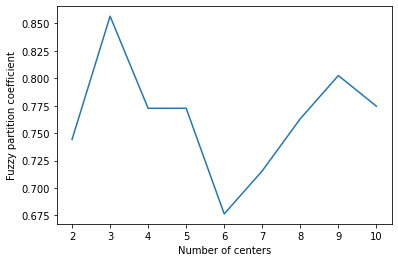

In [48]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [50]:
scaler = StandardScaler()
data_clust_scaled = scaler.fit_transform(dataset)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (2,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(data_clust_scaled)
        score = silhouette_score(data_clust_scaled, labels)
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 2
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 1 50 50 50 99 51 50 50 49]
Silhouette Score: 0.5887505794962142

eps 0.2
\min samples 3
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 1 50 50 50 99 51 50 50 49]
Silhouette Score: 0.5887505794962142

eps 0.2
\min samples 4
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 1 50 50 50 99 51 50 50 49]
Silhouette Score: 0.5887505794962142

eps 0.2
\min samples 5
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 1 50 50 50 99 51 50 50 49]
Silhouette Score: 0.5887505794962142

eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 1 50 50 50 99 51 50 50 49]
Silhouette Score: 0.5887505794962142

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [ 2 50 50 49 99 51 50 50 49]
Silhouette Score: 0.6024630335555676

eps 0.2
\min samples 8
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters si

In [51]:
dbscan = DBSCAN(eps=0.4, min_samples=2)
labels = dbscan.fit_predict(data_clust_scaled)

In [52]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [53]:
core_samples_mask = np.zeros_like(dbscan.labels_, 
                                  dtype = bool) 
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
core_samples_mask[dbscan.core_sample_indices_] = True

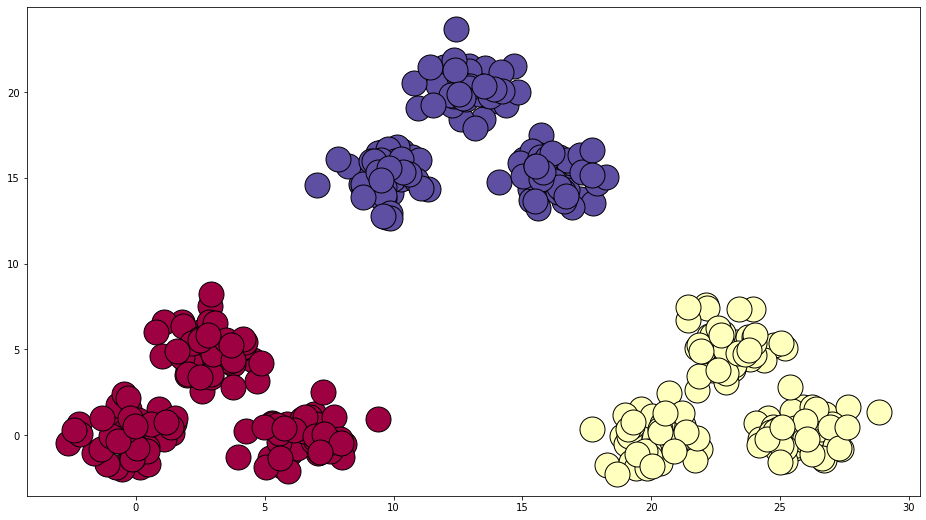

In [56]:
#Fixing the size of the plot
plt.figure(figsize = (16,9)) 
#Getting clusters labels {-1, 0, 1, 2, 3, 4, 5, 6}
unique_labels = set(labels)
#Creating 8 spectral numerical codes for colors from CMYK - cyan, magenta, yellow, and key
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] 

for k, col in zip(unique_labels, colors):
  if k == -1:
    #CMYK numerical list number of pink color
    col = [1, 0, 1, 1] 
  #it is stating that mark as True for -1 and rest of are False in labels
  class_member_mask = (labels == k) 
  #class_member_mask is a outlier data points & core_samples_mask is a core points
  xy = dataset[class_member_mask & core_samples_mask] 
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=25)

  xy = dataset[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=10)


plt.show()